<h3 align=center> In His Name, the Most High </h3>

In [1]:
#importing libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [2]:
#importing train data

train_words = list() # a list of list of words for every sentence in train dataset
train_tags = list() # a list of list of IOB tags for every sentence in train dataset
train_intents = list() # a list of intent for every sentence in train dataset
train_data = list() # a list of dicts contaiting above data in a more structured form
train_vocabs = set() # a set containing whole train dataset words

with open('atis-2.train+dev.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                words.append(word.lower()) #lowerizing
                train_vocabs.add(word.lower())
        train_words.append(words)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
        train_tags.append(tags)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]
        train_intents.append(intent)
        
        train_data.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('train dataset vocab size:', len(train_vocabs))
print('# of train dataset rows:', len(train_data))
print('# of train dataset unique intents:', len(set(train_intents)))
print('# of train dataset unique IOB tags:', len(set([tag for item in train_tags for tag in item])))

train dataset vocab size: 898
# of train dataset rows: 4978
# of train dataset unique intents: 17
# of train dataset unique IOB tags: 121


In [3]:
ind = 0
print('tokenized words:', train_data[ind]['words'])
print('IOB tags:', train_data[ind]['iob_tags'])
print('intent:', train_data[ind]['intent'])

tokenized words: ['i', 'want', 'to', 'fly', 'from', 'baltimore', 'to', 'dallas', 'round', 'trip']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'B-round_trip', 'I-round_trip']
intent: atis_flight


In [4]:
train_intents_freq = dict()
for intent in train_intents:
    train_intents_freq[intent] = train_intents.count(intent)
    
for key in train_intents_freq:
    value = train_intents_freq[key]
    print('%s: %d == %.2f' % (key, value, value / len(train_intents) * 100), '% ,')

atis_flight: 3687 == 74.07 % ,
atis_airfare: 424 == 8.52 % ,
atis_airline: 159 == 3.19 % ,
atis_ground_service: 256 == 5.14 % ,
atis_quantity: 51 == 1.02 % ,
atis_city: 19 == 0.38 % ,
atis_abbreviation: 147 == 2.95 % ,
atis_aircraft: 82 == 1.65 % ,
atis_distance: 20 == 0.40 % ,
atis_ground_fare: 18 == 0.36 % ,
atis_capacity: 16 == 0.32 % ,
atis_flight_time: 54 == 1.08 % ,
atis_meal: 6 == 0.12 % ,
atis_flight_no: 12 == 0.24 % ,
atis_restriction: 6 == 0.12 % ,
atis_airport: 20 == 0.40 % ,
atis_cheapest: 1 == 0.02 % ,


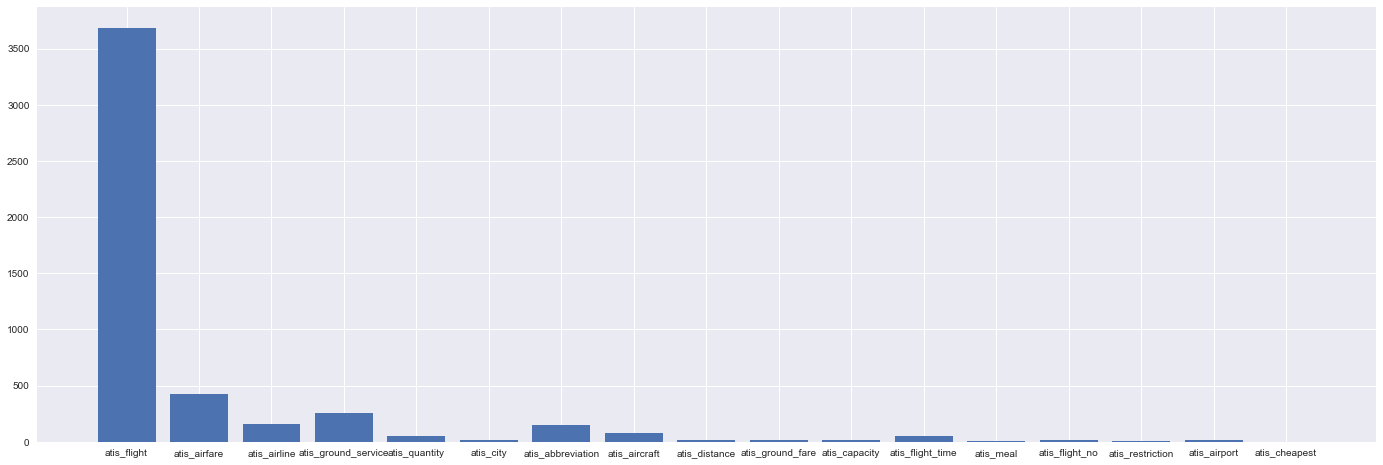

In [5]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_freq.keys()),train_intents_freq.values())
plt.show()

In [6]:
train_tags_freq = dict()
for item in train_tags:
    for tag in item:
        if (tag in train_tags_freq): train_tags_freq[tag] += item.count(tag)
        else: train_tags_freq[tag] = item.count(tag)
train_tags_freq

{'O': 304501,
 'B-fromloc.city_name': 4670,
 'B-toloc.city_name': 4777,
 'B-round_trip': 374,
 'I-round_trip': 361,
 'B-cost_relative': 366,
 'B-fare_amount': 73,
 'I-fare_amount': 71,
 'B-arrive_date.month_name': 47,
 'B-arrive_date.day_number': 47,
 'I-fromloc.city_name': 841,
 'B-stoploc.city_name': 243,
 'B-arrive_time.time_relative': 203,
 'B-arrive_time.time': 224,
 'I-arrive_time.time': 191,
 'B-toloc.state_code': 86,
 'I-toloc.city_name': 1289,
 'I-stoploc.city_name': 75,
 'B-meal_description': 57,
 'B-depart_date.month_name': 387,
 'B-depart_date.day_number': 413,
 'B-airline_name': 743,
 'I-airline_name': 449,
 'B-depart_time.period_of_day': 707,
 'B-depart_date.day_name': 1001,
 'B-toloc.state_name': 77,
 'B-depart_time.time_relative': 343,
 'B-depart_time.time': 391,
 'B-toloc.airport_name': 39,
 'I-toloc.airport_name': 77,
 'B-depart_date.date_relative': 82,
 'B-or': 84,
 'B-airline_code': 148,
 'B-class_type': 225,
 'I-class_type': 189,
 'I-cost_relative': 55,
 'I-depart_

In [7]:
#importing test data

test_words = list()  # a list of list of words for every sentence in test dataset
test_tags = list() # a list of list of IOB tags for every sentence in test dataset
test_intents = list() # a list of intent for every sentence in test dataset
test_vocabs = set() # a list of dicts contaiting above data in a more structured form
test_data = list() # a set containing whole test dataset words

with open('atis.test.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                words.append(word.lower()) #lowerizing 
                test_vocabs.add(word.lower())
        test_words.append(words)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
        test_tags.append(tags)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]
        test_intents.append(intent)
        
        test_data.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('train dataset vocab size:', len(test_vocabs))
print('# of test dataset rows:', len(test_data))
print('# of test dataset unique intents:', len(set(test_intents)))
print('# of test dataset unique IOB tags:', len(set([tag for item in test_tags for tag in item])))

train dataset vocab size: 448
# of test dataset rows: 893
# of test dataset unique intents: 16
# of test dataset unique IOB tags: 101


In [8]:
ind = 0
print('tokenized words:', test_data[ind]['words'])
print('IOB tags:', test_data[ind]['iob_tags'])
print('intent:', test_data[ind]['intent'])

tokenized words: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st.', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


In [9]:
test_intents_freq = dict()
for intent in test_intents:
    test_intents_freq[intent] = test_intents.count(intent)
    
for key in test_intents_freq:
    value = test_intents_freq[key]
    print('%s: %d == %.2f' % (key, value, value / len(test_intents) * 100), '% ,')

atis_flight: 645 == 72.23 % ,
atis_airfare: 49 == 5.49 % ,
atis_ground_service: 36 == 4.03 % ,
atis_day_name: 2 == 0.22 % ,
atis_meal: 6 == 0.67 % ,
atis_airport: 18 == 2.02 % ,
atis_airline: 38 == 4.26 % ,
atis_flight_time: 1 == 0.11 % ,
atis_city: 6 == 0.67 % ,
atis_ground_fare: 7 == 0.78 % ,
atis_quantity: 3 == 0.34 % ,
atis_abbreviation: 33 == 3.70 % ,
atis_distance: 10 == 1.12 % ,
atis_aircraft: 9 == 1.01 % ,
atis_capacity: 21 == 2.35 % ,
atis_flight_no: 9 == 1.01 % ,


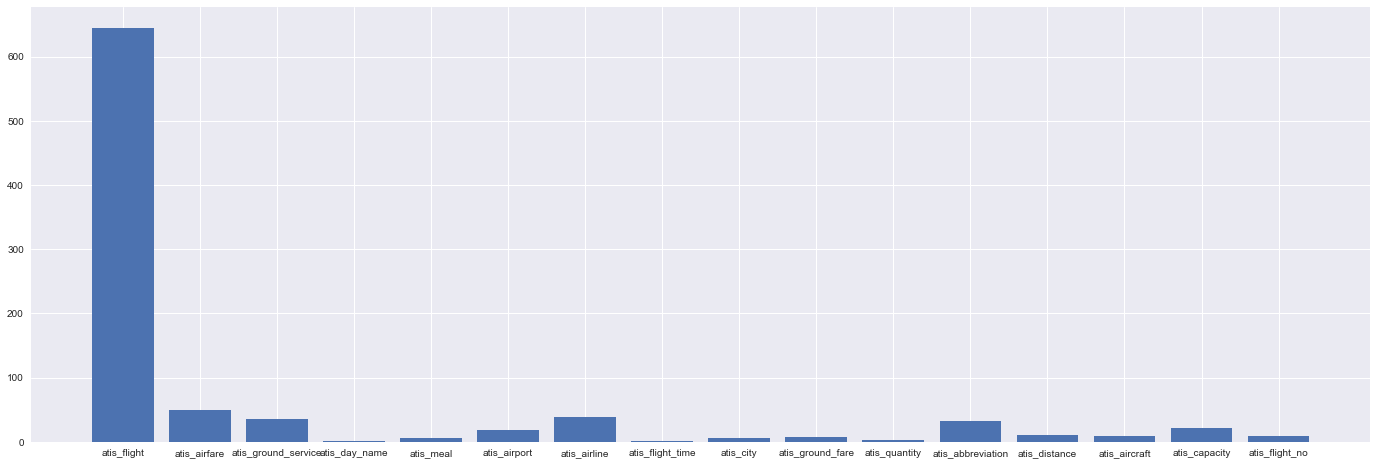

In [10]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_freq.keys()),test_intents_freq.values())
plt.show()

In [11]:
test_tags_freq = dict()
for item in test_tags:
    for tag in item:
        if (tag in test_tags_freq): test_tags_freq[tag] += item.count(tag)
        else: test_tags_freq[tag] = item.count(tag)
test_tags_freq

{'O': 39659,
 'B-fromloc.city_name': 730,
 'B-toloc.city_name': 764,
 'I-toloc.city_name': 369,
 'B-stoploc.city_name': 20,
 'I-stoploc.city_name': 10,
 'B-depart_date.month_name': 56,
 'B-depart_date.day_number': 55,
 'B-depart_time.time_relative': 65,
 'B-depart_time.time': 57,
 'I-depart_time.time': 52,
 'B-round_trip': 73,
 'I-round_trip': 71,
 'B-airline_name': 125,
 'I-airline_name': 75,
 'B-depart_date.day_name': 222,
 'B-depart_time.period_of_day': 142,
 'I-fromloc.city_name': 203,
 'B-meal_description': 10,
 'B-depart_date.date_relative': 17,
 'B-arrive_time.time_relative': 33,
 'B-arrive_time.time': 34,
 'I-arrive_time.time': 37,
 'B-return_date.day_name': 2,
 'B-arrive_date.date_relative': 2,
 'B-arrive_date.day_name': 11,
 'B-flight_stop': 21,
 'B-depart_date.today_relative': 9,
 'B-toloc.state_name': 28,
 'B-arrive_date.month_name': 6,
 'B-arrive_date.day_number': 6,
 'B-arrive_time.start_time': 8,
 'B-arrive_time.end_time': 8,
 'I-arrive_time.end_time': 8,
 'B-airport_nam

##### comparing train & test dataset tags & intents:

In [12]:
print(test_vocabs.difference(train_vocabs))

{'dtw', 'wn', '1994', '468', '665', 'mci', 'exceeding', 'l1011', 'snacks', 'included', 'comes', 'combination', 'kw', '1201', 'sb', 'tpa', 'sam', 'called', 'not', '382', 'be1', 'bh', 'cvg', 'kennedy', 'miles', 'basis', 'bn', '608', 'dca', '320', 'phl', '20', 'l10', '842', 'ap58', '419', '1207', 'yx', 'dc9', 'good', '486', 'india', 'ever', '673', 'dh8', '639', '950', 'lga', '1800', '811', 'prior', 'al'}


In [13]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there is no train data for 'atis_day_name'...

In [14]:
set(train_intents).difference(set(test_intents))

{'atis_cheapest', 'atis_restriction'}

and also there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [15]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [16]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

to handle imbalanced data first we try to find and remove duplicates:

In [17]:
#finding and removing duplicates in train data

train_words_dup_free = list()
train_tags_dup_free = list()
train_intents_dup_free = list()
train_data_dup_free = list()
for i in range(len(train_words)):
    words = train_words[i]
    tags = train_tags[i]
    intent = train_intents[i]
    if (words not in train_words_dup_free):
        train_words_dup_free.append(words)
        train_tags_dup_free.append(tags)
        train_intents_dup_free.append(intent)
        train_data_dup_free.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('# of duplicate sentences in train data: %d - %d = %d' % (len(train_words), len(train_words_dup_free), len(train_words) - len(train_words_dup_free)))

# of duplicate sentences in train data: 4978 - 4634 = 344


In [18]:
train_intents_dup_free_freq = dict()
for intent in train_intents_dup_free:
    train_intents_dup_free_freq[intent] = train_intents_dup_free.count(intent)

for key in train_intents_dup_free_freq:
    value = train_intents_dup_free_freq[key]
    print('%s: %d == %.2f' % (key, value, value / len(train_intents_dup_free) * 100), '% ,')

atis_flight: 3443 == 74.30 % ,
atis_airfare: 404 == 8.72 % ,
atis_airline: 150 == 3.24 % ,
atis_ground_service: 236 == 5.09 % ,
atis_quantity: 49 == 1.06 % ,
atis_city: 18 == 0.39 % ,
atis_abbreviation: 108 == 2.33 % ,
atis_aircraft: 79 == 1.70 % ,
atis_distance: 20 == 0.43 % ,
atis_ground_fare: 17 == 0.37 % ,
atis_capacity: 16 == 0.35 % ,
atis_flight_time: 52 == 1.12 % ,
atis_meal: 6 == 0.13 % ,
atis_flight_no: 12 == 0.26 % ,
atis_restriction: 5 == 0.11 % ,
atis_airport: 18 == 0.39 % ,
atis_cheapest: 1 == 0.02 % ,


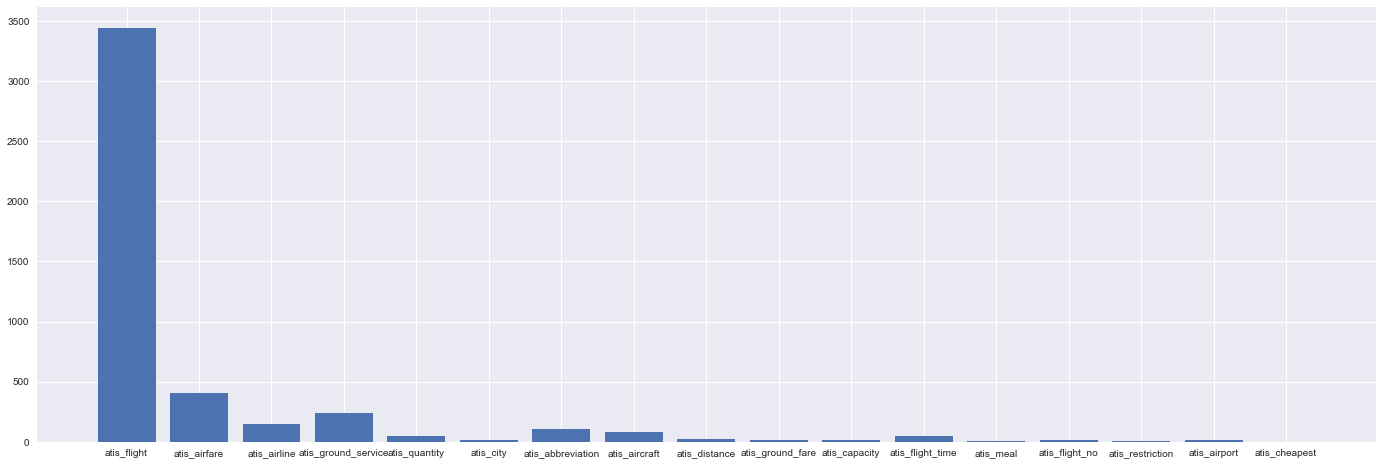

In [19]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_dup_free_freq.keys()),train_intents_dup_free_freq.values())
plt.show()

In [20]:
#finding and removing duplicates in test data

test_words_dup_free = list()
test_tags_dup_free = list()
test_intents_dup_free = list()
test_data_dup_free = list()
for i in range(len(test_words)):
    words = test_words[i]
    tags = test_tags[i]
    intent = test_intents[i]
    if (words not in test_words_dup_free):
        test_words_dup_free.append(words)
        test_tags_dup_free.append(tags)
        test_intents_dup_free.append(intent)
        test_data.append({
            'words': words,
            'iob_tags': tags,
#             'length': len(words),
            'intent': intent})


print('# of duplicate sentences in test data: %d - %d = %d' % (len(test_words), len(test_words_dup_free),  len(test_words) - len(test_words_dup_free)))

# of duplicate sentences in test data: 893 - 850 = 43


In [21]:
test_intents_dup_free_freq = dict()
for intent in test_intents_dup_free:
    test_intents_dup_free_freq[intent] = test_intents_dup_free.count(intent)

for key in test_intents_dup_free_freq:
    value = test_intents_dup_free_freq[key]
    print('%s: %d == %.2f' % (key, value, value / len(test_intents_dup_free) * 100), '% ,')

atis_flight: 626 == 73.65 % ,
atis_airfare: 49 == 5.76 % ,
atis_ground_service: 36 == 4.24 % ,
atis_day_name: 2 == 0.24 % ,
atis_meal: 6 == 0.71 % ,
atis_airport: 13 == 1.53 % ,
atis_airline: 28 == 3.29 % ,
atis_flight_time: 1 == 0.12 % ,
atis_city: 5 == 0.59 % ,
atis_ground_fare: 7 == 0.82 % ,
atis_quantity: 3 == 0.35 % ,
atis_abbreviation: 26 == 3.06 % ,
atis_distance: 10 == 1.18 % ,
atis_aircraft: 8 == 0.94 % ,
atis_capacity: 21 == 2.47 % ,
atis_flight_no: 9 == 1.06 % ,


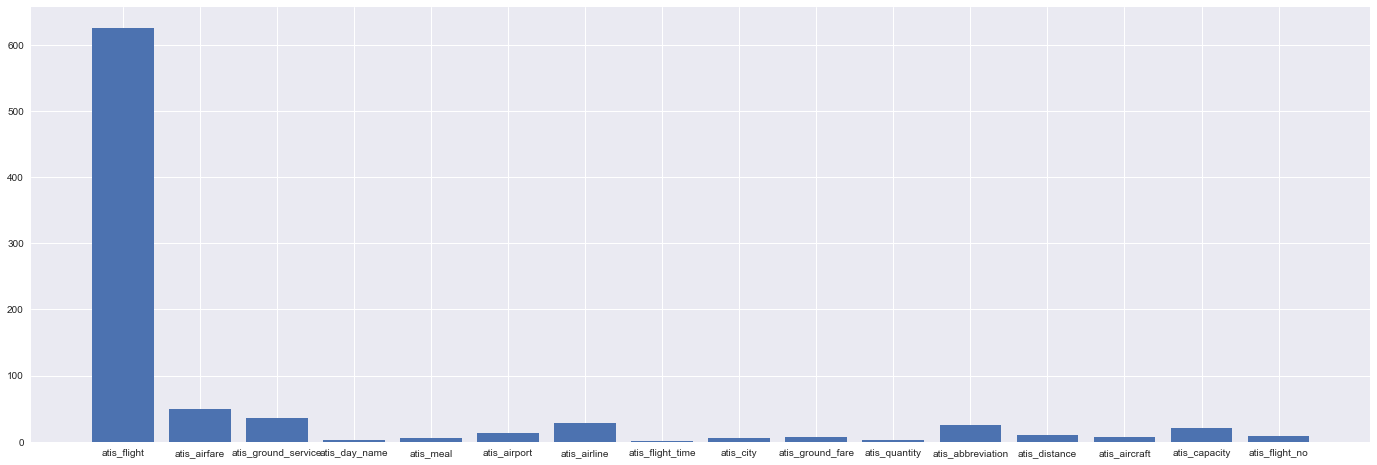

In [22]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_dup_free_freq.keys()),test_intents_dup_free_freq.values())
plt.show()

so we can see that unfortunately removing duplicates didn't have any noticable improvment on balancing the dataset.

In [23]:
#in progress! --> finding other techniques for imbalance data handling